IMPORT THE NECESSARY PACKAGES

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.utils import np_utils
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import load_model
from PIL import Image, ImageOps

LOAD DATA

In [4]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


DATA ANALYSIS

In [5]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [6]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [7]:
y_train[0]

5

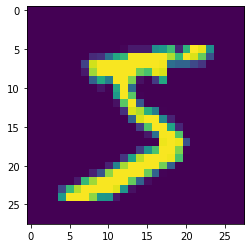

In [8]:
plt.imshow(X_train[0])

DATA PRE-PROCESSING

In [9]:
X_train = X_train.reshape(60000, 28, 28, 1).astype('float32')
X_test = X_test.reshape(10000, 28, 28, 1).astype('float32')

In [10]:
number_of_classes = 10
Y_train = np_utils.to_categorical(y_train, number_of_classes)
Y_test = np_utils.to_categorical(y_test, number_of_classes)

In [11]:
Y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

CREATE MODEL

In [12]:
model = Sequential()
model.add(Conv2D(64, (3, 3), input_shape=(28, 28, 1), activation="relu"))
model.add(Conv2D(32, (3, 3), activation="relu"))
model.add(Flatten())
model.add(Dense(number_of_classes, activation="softmax"))

In [13]:
model.compile(loss='categorical_crossentropy', optimizer="Adam", metrics=["accuracy"])

TRAIN THE MODEL

In [14]:
model.fit(X_train, Y_train, batch_size=32, epochs=5, validation_data=(X_test,Y_test))

Epoch 1/5
1875/1875 [==============================] - 195s 104ms/step - loss: 0.2159 - accuracy: 0.9513 - val_loss: 0.0899 - val_accuracy: 0.9740
Epoch 2/5
1875/1875 [==============================] - 191s 102ms/step - loss: 0.0679 - accuracy: 0.9799 - val_loss: 0.0811 - val_accuracy: 0.9770
Epoch 3/5
1875/1875 [==============================] - 190s 101ms/step - loss: 0.0445 - accuracy: 0.9855 - val_loss: 0.0899 - val_accuracy: 0.9801
Epoch 4/5
1875/1875 [==============================] - 191s 102ms/step - loss: 0.0374 - accuracy: 0.9885 - val_loss: 0.0881 - val_accuracy: 0.9788
Epoch 5/5
1875/1875 [==============================] - 193s 103ms/step - loss: 0.0276 - accuracy: 0.9919 - val_loss: 0.1031 - val_accuracy: 0.9795


TEST THE MODEL

In [15]:
metrics = model.evaluate(X_test, Y_test, verbose=0)
print("Metrics (Test Loss & Test Accuracy): ")
print(metrics)

Metrics (Test Loss & Test Accuracy): 
[0.10311572253704071, 0.9794999957084656]


In [21]:
prediction = model.predict(X_test[:4])
print(prediction)
import numpy as np
print(np.argmax(prediction, axis=1))
print(Y_test[:4])

1/1 [==============================] - 0s 28ms/step
[[2.5263151e-11 1.0213212e-19 3.7833683e-10 9.7762069e-14 1.8191286e-16
  1.1850630e-15 3.1335631e-21 1.0000000e+00 9.8436329e-12 8.5291599e-13]
 [3.8929833e-09 8.1967191e-13 9.9999988e-01 2.6094883e-11 4.4915762e-17
  2.0126835e-18 1.5545841e-07 1.8247336e-20 6.7948012e-09 7.1940171e-18]
 [2.4984888e-12 9.9996257e-01 7.0599175e-09 1.2423818e-15 4.0353675e-06
  8.0818321e-09 4.9573027e-14 6.9621292e-12 3.3322151e-05 2.7763221e-14]
 [9.9999678e-01 6.9276171e-17 1.4742031e-11 2.2819099e-15 2.1458497e-14
  1.4362670e-12 3.0402939e-06 2.4283185e-13 8.6172497e-10 9.2528900e-08]]
[7 2 1 0]
[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


SAVE THE MODEL

In [22]:
model.save("model.h5")

TEST THE SAVED MODEL

In [23]:
model=load_model("model.h5")

In [24]:
img = Image.open("/content/drive/MyDrive/ibm sprints/SPRINT 3/sample.png").convert("L")
img = img.resize((28, 28))
img2arr = np.array(img)
img2arr = img2arr.reshape(1, 28, 28, 1)
results  = model.predict(img2arr)
results = np.argmax(results,axis = 1)
results = pd.Series(results,name="Label")
print(results)

1/1 [==============================] - 0s 70ms/step
0    2
Name: Label, dtype: int64
